In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
input_path="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Users\\Users_2017_2020.csv"

In [2]:
data=pd.read_csv(input_path,names=["AccId","CreateDate","LastAccessDate","ViewsNum","UpVotes","DownVotes"])
data.head()
# commits_2019,commits_2020=preprocess_monthly_commit(data)
# plot_monthly_commit(commits_2019,commits_2020,"Clojure")

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes
0,9883458,2017-01-01T00:00:56.717,2019-05-27T18:03:42.687,2,0,0
1,9947518,2017-01-01T00:01:12.400,2019-10-25T14:06:55.630,0,0,0
2,9947524,2017-01-01T00:04:35.913,2018-06-08T20:13:35.803,1,0,0
3,9947525,2017-01-01T00:06:08.170,2019-07-12T16:35:43.657,0,0,0
4,9947527,2017-01-01T00:09:40.727,2017-01-06T01:26:02.110,0,0,0


In [3]:
data["CreateDate"] = pd.to_datetime(data["CreateDate"])
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes
0,9883458,2017-01-01 00:00:56.717,2019-05-27T18:03:42.687,2,0,0
1,9947518,2017-01-01 00:01:12.400,2019-10-25T14:06:55.630,0,0,0
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0


In [4]:
data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)

In [5]:
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear
0,9883458,2017-01-01 00:00:56.717,2019-05-27T18:03:42.687,2,0,0,2017
1,9947518,2017-01-01 00:01:12.400,2019-10-25T14:06:55.630,0,0,0,2017
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017


In [6]:
data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)


In [7]:
data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear,CreateMonth,CreateYearMonth
0,9883458,2017-01-01 00:00:56.717,2019-05-27T18:03:42.687,2,0,0,2017,1,2017-1
1,9947518,2017-01-01 00:01:12.400,2019-10-25T14:06:55.630,0,0,0,2017,1,2017-1
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017,1,2017-1
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017,1,2017-1
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017,1,2017-1


In [8]:
data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])

In [9]:
data.head()

,AccId,CreateDate,LastAccessDate,ViewsNum,UpVotes,DownVotes,CreateYear,CreateMonth,CreateYearMonth
0,9883458,2017-01-01 00:00:56.717,2019-05-27T18:03:42.687,2,0,0,2017,1,2017-01-01
1,9947518,2017-01-01 00:01:12.400,2019-10-25T14:06:55.630,0,0,0,2017,1,2017-01-01
2,9947524,2017-01-01 00:04:35.913,2018-06-08T20:13:35.803,1,0,0,2017,1,2017-01-01
3,9947525,2017-01-01 00:06:08.170,2019-07-12T16:35:43.657,0,0,0,2017,1,2017-01-01
4,9947527,2017-01-01 00:09:40.727,2017-01-06T01:26:02.110,0,0,0,2017,1,2017-01-01


In [10]:
creation_yearly_monthly = pd.DataFrame(data[["AccId", "CreateYearMonth"]])

In [11]:
creation_yearly_monthly.head()

,AccId,CreateYearMonth
0,9883458,2017-01-01
1,9947518,2017-01-01
2,9947524,2017-01-01
3,9947525,2017-01-01
4,9947527,2017-01-01


In [12]:
yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
yearly_monthly_grp.head()

,CreateYearMonth,counts
0,2017-01-01,130750
1,2017-02-01,136319
2,2017-03-01,156891
3,2017-04-01,141302
4,2017-05-01,145374


Text(0, 0.5, 'Account Creations')

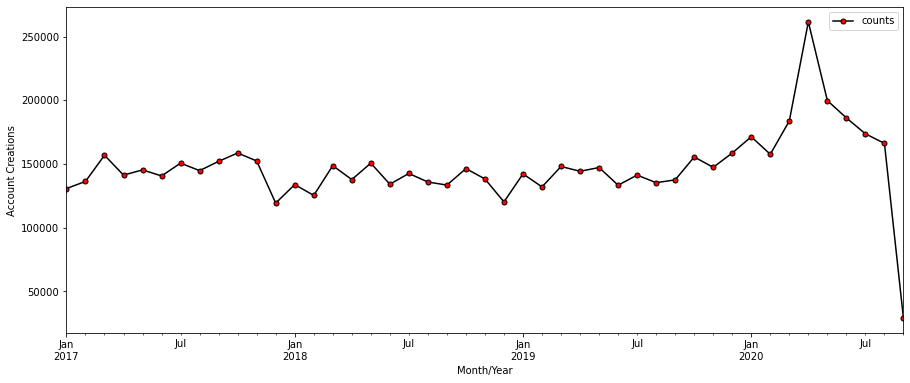

In [13]:
yearly_monthly_grp.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.xticks(np.arange(min(yearly_monthly_grp['CreateYearMonth']), max(yearly_monthly_grp['CreateYearMonth'])+1, 1.0))
# plt.yticks(np.arange(min(yearly_monthly_grp['counts']), max(yearly_monthly_grp['counts'])+1000, 20000))
# plt.xticks(yearly_monthly_grp['CreateYearMonth'])
# plt.rcParams.update({'font.size': 12})
plt.xlabel('Month/Year')
plt.ylabel('Account Creations')